In [ ]:
pip install pandas numpy sklearn nltk seaborn matplotlib tensorflow keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=325a7cb754881be2ae22cf7b306694b53f80a41be2902bbbbc410e6e08c72468
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn




First, the necessary libraries are imported, including matplotlib.pyplot, pandas, numpy, sklearn, nltk, and seaborn.The read_csv function in pandas is used to load the dataset of Amazon customer reviews from a URL.Using the str.lower() and str.replace() functions, the text data is preprocessed by making all text lowercase and deleting punctuation.Using the word_tokenize function from nltk, the text is then tokenized. The list of stop words from the English language provided by nltk is used to eliminate stop words from sentences. PorterStemmer from nltk is used for stemming as well.To apply tokenization, stop word removal, and stemming to the text data, a preprocessing function called "preprocess_text" is defined.

The apply function is used to apply the preprocessing function to the DataFrame's'reviews.text' column.

Using TF-IDF vectorization, the preprocessed text is next turned into a matrix of numerical features that can be used for sentiment analysis. Based on the rating, a binary sentiment label is generated. The sentiment is classified as positive (1) if the rating is greater than 3, and as negative (0) otherwise.

Using the train_test_split function from sklearn, the data is divided into training and testing sets.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/hrhaditya/amazon-customer-review-sentiment-analysis/main/1429_1.csv"
df = pd.read_csv(url)

# Data Preprocessing
# Convert text to lowercase
df['reviews.text'] = df['reviews.text'].str.lower()

# Remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')


# Tokenization, Stop Word Removal and Stemming
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Make sure all entries are strings
df['reviews.text'] = df['reviews.text'].astype(str)

# Preprocessing function
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [stemmer.stem(w) for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

# Now apply the preprocessing function
df['reviews.text'] = df['reviews.text'].apply(preprocess_text)

# Feature Engineering
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviews.text'])

# Binary sentiment label
df['sentiment_label'] = df['reviews.rating'].apply(lambda x: 1 if x > 3 else 0)

# Split data into train and test sets
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-2-1cca33e13c20>:19: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)
<ipython-input-2-1cca33e13c20>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')




Utilizing the scikit-learn library's SelectKBest, the code selects features. The features are graded using the ANOVA F-value measure. The program then obtains the top 10 characteristics and their associated scores, arranges them according to the scores in descending order, and outputs the results. A Pandas DataFrame is used to hold the feature names and their scores. The TfidfVectorizer used earlier in the code yielded the feature names.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply SelectKBest class to extract top 10 best features using ANOVA F-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the scores of each feature
feature_scores = fit.scores_

# Create a DataFrame that contains the feature names and their corresponding scores
features = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})

# Sort the DataFrame in descending order based on the scores
features = features.sort_values(by='Score', ascending=False)

# Print the top 10 features
print(features.head(10))


          Feature        Score
10477      return  1511.462629
11271        slow   813.627831
8691           ok   650.456952
7514         love   419.988851
5639        great   291.905916
5534        googl   239.028548
4063         easi   221.704426
3834       doesnt   206.938976
3870         dont   198.514022
3706   disappoint   197.102664


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)


In [ ]:
from sklearn.preprocessing import StandardScaler

X_dense = X.toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.metrics import classification_report

from sklearn import svm

# Support Vector Classifier
svc = svm.SVC(kernel='linear')

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.79      0.14      0.23       677
           1       0.94      1.00      0.97      9721

    accuracy                           0.94     10398
   macro avg       0.86      0.57      0.60     10398
weighted avg       0.93      0.94      0.92     10398



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.15      0.25       677
           1       0.94      1.00      0.97      9721

    accuracy                           0.94     10398
   macro avg       0.85      0.57      0.61     10398
weighted avg       0.93      0.94      0.92     10398



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions
y_pred_gbc = gbc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gbc))


              precision    recall  f1-score   support

           0       0.64      0.13      0.21       677
           1       0.94      0.99      0.97      9721

    accuracy                           0.94     10398
   macro avg       0.79      0.56      0.59     10398
weighted avg       0.92      0.94      0.92     10398



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


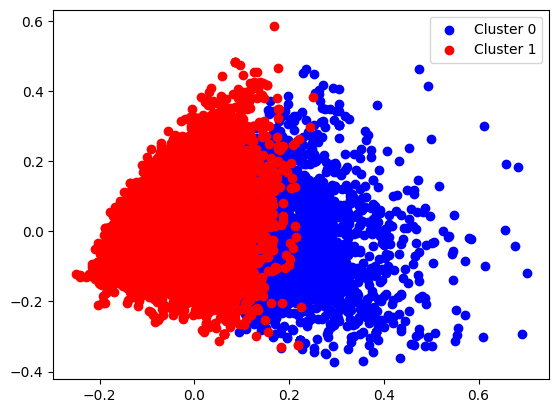

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Let's create 2 clusters
num_clusters = 2
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X_train)

# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X_train.toarray())

colors = ["blue", "red"]

# Let's visualize the clusters
for i in range(num_clusters):
    plt.scatter(scatter_plot_points[kmeans_model.labels_== i, 0],
                scatter_plot_points[kmeans_model.labels_ == i, 1], 
                color=colors[i], 
                label=f'Cluster {i}')
plt.legend()
plt.show()


 outlier and anomoly detection

In [ ]:
from sklearn.ensemble import IsolationForest

# Isolation Forest for anomaly detection
clf = IsolationForest(random_state=42)
pred = clf.fit_predict(X)

# Add anomaly labels to our dataframe (-1 is an anomaly)
df['anomaly'] = pred
# Count the number of anomalies and normal points. Here, -1 indicates an anomaly.
anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

print(f"Anomalies: {anomalies.shape[0]}")
print(f"Normal: {normal.shape[0]}")


Anomalies: 0
Normal: 34660




This code uses the Isolation Forest technique to perform anomaly identification on the text data in df['reviews.txt'].

The text data is first vectorized with a cap of 1000 features using TfidfVectorizer. The contamination rate of 0.1, which indicates the anticipated percentage of outliers in the data, is then used to generate an instance of IsolationForest. On the vectorized text data, the fit_predict() method of the IsolationForest instance is used to forecast the existence of anomalies.

Fit_predict() returns an array with the values -1 for anomalies and 1 for regular data. There is a new column df['outliers'] created for this array. The variable anomalies is then assigned a subset of df that only includes the rows with anomalies (df['outliers'] == -1).


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest

# Vectorization of text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # limit to top 1000 words
reviews_tfidf = vectorizer.fit_transform(df['reviews.text'])

# Now use Isolation Forest on this tfidf
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(reviews_tfidf.toarray())  # convert sparse matrix to dense

# The prediction returns an array with -1 indicating anomalies and 1 indicating normal data
df['outliers'] = outliers

# Check the anomaly detected data
anomalies = df[df['outliers'] == -1]

print(f"Anomalies: {anomalies.shape[0]}")

Anomalies: 3466


The import of IsolationForest comes from sklearn.ensemble. In order to fit a model, IsolationForest is used. With contamination set to 0.01, the model will identify 1% of the data as anomalous. The reproducibility setting for random_state is 42. To anticipate the anomalies, the fit_predict algorithm is used on the X_train training data. Preds is where the predictions are kept. For anomalies, the projections produce -1, and for regular data, they produce 1.

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit the model
clf = IsolationForest(contamination=0.01, random_state=42)
preds = clf.fit_predict(X_train.toarray())

# Let's print the anomaly prediction {-1: anomaly, 1: normal}
print(preds)


[1 1 1 ... 1 1 1]


 "Advanced Techniques"



The Keras library is used in this code to build, train, and test a straightforward neural network model for binary classification.

The toarray() method is used to convert the text input to numpy arrays first. Then, a sequential model is defined with two layers, the first using the relu activation function and having 64 units, and the second using the sigmoid activation function and having one unit. The Adam optimizer, binary crossentropy loss function, and accuracy are then used to construct the model. The fit approach is used to train the model on the training set for 10 epochs with a batch size of 32. Finally, the model is assessed using the accuracy and evaluation methods on the test set.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# convert to numpy arrays
X_train_np = X_train.toarray()
X_test_np = X_test.toarray()

# Define model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_np.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_np, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_np, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))


Epoch 1/10
759/759 [==============================] - 15s 19ms/step - loss: 0.2446 - accuracy: 0.9309
Epoch 2/10
759/759 [==============================] - 13s 17ms/step - loss: 0.1566 - accuracy: 0.9428
Epoch 3/10
759/759 [==============================] - 13s 17ms/step - loss: 0.1299 - accuracy: 0.9538
Epoch 4/10
759/759 [==============================] - 14s 18ms/step - loss: 0.1121 - accuracy: 0.9615
Epoch 5/10
759/759 [==============================] - 12s 16ms/step - loss: 0.0971 - accuracy: 0.9681
Epoch 6/10
759/759 [==============================] - 12s 16ms/step - loss: 0.0836 - accuracy: 0.9737
Epoch 7/10
759/759 [==============================] - 14s 18ms/step - loss: 0.0724 - accuracy: 0.9774
Epoch 8/10
759/759 [==============================] - 13s 16ms/step - loss: 0.0619 - accuracy: 0.9814
Epoch 9/10
759/759 [==============================] - 13s 17ms/step - loss: 0.0531 - accuracy: 0.9846
Epoch 10/10
759/759 [==============================] - 13s 17ms/step - loss: 0.045

 "Visualization", we will plot a confusion matrix using Matplotlib and Seaborn.



This programme uses Keras to train a neural network model and graphs the loss and accuracy with time.

First, using the fit() function, the model is trained on the training data, with 20% of it being used for validation. The training history is then saved in the history variable.

Then, using Matplotlib, two distinct plots are produced. The model's accuracy on the training and validation data over epochs is shown in the second plot, while the model's loss on the training and validation data is shown in the first. The loss and accuracy values for each epoch are retrieved for both plots using the history variable, and the graphs are labeled and displayed using the matplotlib plot() and show() methods.


Epoch 1/10
607/607 [==============================] - 13s 20ms/step - loss: 0.0375 - accuracy: 0.9901 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 2/10
607/607 [==============================] - 12s 20ms/step - loss: 0.0310 - accuracy: 0.9921 - val_loss: 0.0502 - val_accuracy: 0.9833
Epoch 3/10
607/607 [==============================] - 12s 20ms/step - loss: 0.0259 - accuracy: 0.9937 - val_loss: 0.0580 - val_accuracy: 0.9784
Epoch 4/10
607/607 [==============================] - 11s 19ms/step - loss: 0.0220 - accuracy: 0.9948 - val_loss: 0.0632 - val_accuracy: 0.9777
Epoch 5/10
607/607 [==============================] - 11s 17ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 0.0740 - val_accuracy: 0.9742
Epoch 6/10
607/607 [==============================] - 11s 19ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0814 - val_accuracy: 0.9716
Epoch 7/10
607/607 [==============================] - 11s 18ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0932 - val_accuracy:

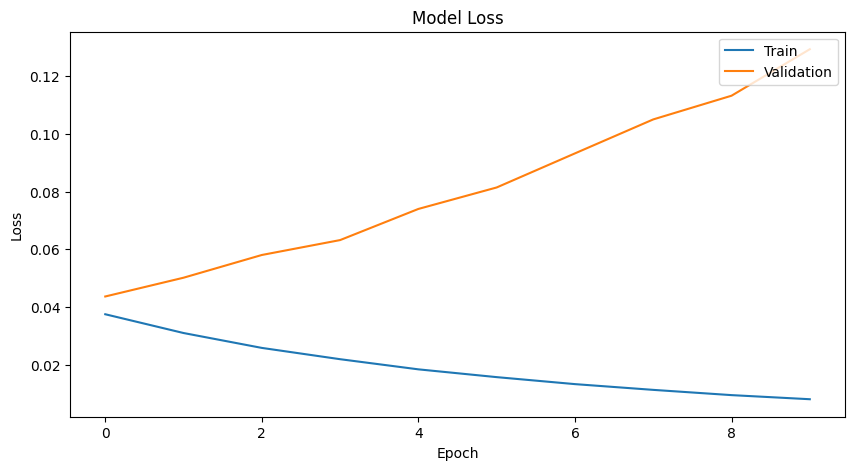

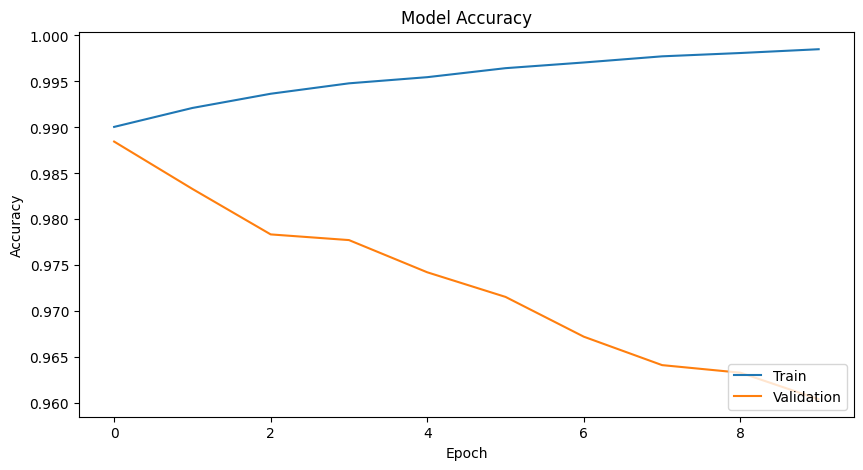

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train_np, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Plotting Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()




Word Cloud Visualization

Using the WordCloud library, the code creates a word cloud visualization. The review texts are combined into a single string variable called combined_text from a DataFrame with the name df. Following that, a WordCloud object is made and set up to use a white background. To create the word cloud image, the combined_text variable is passed as an input to the generate() method. Finally, using the matplotlib imshow() and show() methods, the generated image is displayed. The resulting graphic displays the words that appeared the most frequently in the review texts, with bigger words denoting more frequency.


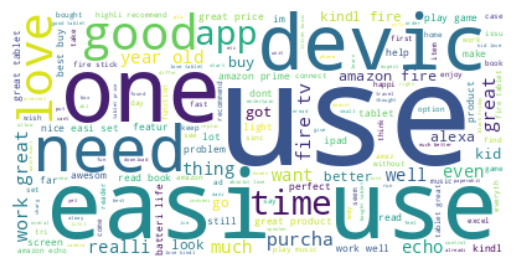

In [ ]:
from wordcloud import WordCloud

# Combine all review texts
combined_text = " ".join(df['reviews.text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(combined_text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
